Cargamos el modelo desde un pickle para no perder los tipos de datos de las columnas, puesto que con csv los perderiamos

In [ ]:
import polars as pl
import pickle


with open("datos_cleaned_grouped.pkl", "rb") as file:
    df = pickle.load(file)

df = df.sort("InvoiceDate")
df


InvoiceDate,TotalSales,weekday,is_holiday,is_month_start,is_month_end,quarter_num,Lag_1,Lag_7,Lag_30,MA_7,MA_14,MA_30
date,f64,i8,i64,i8,i8,i8,f64,f64,f64,f64,f64,f64
2010-12-01,26604.56,3,0,1,0,4,21458.16,12591.23,36867.04,17899.431429,15234.28,17913.767333
2010-12-02,23203.33,4,0,1,0,4,11153.43,3981.37,13652.66,13151.775714,13674.501429,15200.728667
2010-12-05,20738.69,7,0,1,0,4,16977.64,22369.06,10370.63,17773.847143,16847.534286,15992.225333
2010-12-07,25345.38,2,0,1,0,4,11789.36,13215.98,35696.84,18000.218571,16411.863571,16612.621667
2010-12-08,26379.94,3,0,1,0,4,22369.06,12371.26,19162.26,17922.461429,15320.713571,15808.637667
…,…,…,…,…,…,…,…,…,…,…,…,…
2011-12-05,45057.32,1,0,1,0,4,15855.32,35696.84,7439.5,17321.857143,20623.167143,18314.883
2011-12-06,26898.4,2,0,1,0,4,3321.05,15938.83,4937.29,16671.73,18132.44,17275.171667
2011-12-07,27847.03,3,0,1,0,4,15285.24,12741.68,11251.67,17794.714286,17413.577143,17650.127333


Luego creamos dos constantes, una para las caracteristicas que vamos a usar,
y otra para el objetivo de prediccion

In [ ]:
FEATURES = ["weekday", "is_holiday", "is_month_start", "is_month_end", "quarter_num",
            "Lag_1", "Lag_7", "Lag_30", "MA_7", "MA_14", "MA_30"]
TARGET = "TotalSales"

Ahora necesitamos crear los datos de entrenamiento y prueba, para ello haremos un 80/20 (80% para el entrenamiento y 20% para el testing)

In [ ]:


train_size = int(len(df) * 0.8)
train_df, test_df = df[:train_size], df[train_size:]

X_train, y_train = train_df[FEATURES], train_df[TARGET]
X_test, y_test = test_df[FEATURES], test_df[TARGET]

En esta parte haremos una serie representaciones graficas de la precision de predicciones de los distintos modelos que vamos a emplear. Genera un DataFrame con ventas reales, predichas y con los errores. En las distintas graficas(Dispersión, histograma, serie temporal, evolución de la precisión) compararemos las ventas reales con las predichas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def exec_analysis(y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        mask = (y_true != 0) & (~np.isnan(y_true)) & (~np.isnan(y_pred))  # Evita errores
        return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100



    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - mape


    metricas = {
        "MAPE (Mean Absolute Percentage Error)": mape,
        "Precisión del Modelo (%)": accuracy
    }

    print(metricas)

    df_results = pd.DataFrame({
        "Fecha": test_df["InvoiceDate"],
        # "País": test_df["Country"],
        "Ventas Reales": y_test,
        "Ventas Predichas": y_pred,
        "Error Absoluto": np.abs(y_test - y_pred),
        "Error Relativo (%)": np.abs((y_test - y_pred) / y_test) * 100
    })


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - mape


    fig, ax = plt.subplots(2, 2, figsize=(12, 10))


    ax[0, 0].scatter(y_test, y_pred, alpha=0.5)
    ax[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    ax[0, 0].set_xlabel("Ventas Reales")
    ax[0, 0].set_ylabel("Ventas Predichas")
    ax[0, 0].set_title("Comparación de Ventas Reales vs Predichas")


    sns.histplot(df_results["Error Absoluto"], bins=30, kde=True, ax=ax[0, 1])
    ax[0, 1].set_title("Distribución del Error Absoluto")
    ax[0, 1].set_xlabel("Error Absoluto en Ventas")


    df_results = df_results.sort_values("Fecha")
    ax[1, 0].plot(df_results["Fecha"], df_results["Ventas Reales"], label="Ventas Reales", marker='o')
    ax[1, 0].plot(df_results["Fecha"], df_results["Ventas Predichas"], label="Ventas Predichas", marker='x')
    ax[1, 0].set_title("Evolución de Ventas Reales vs Predichas")
    ax[1, 0].set_xlabel("Fecha")
    ax[1, 0].set_ylabel("Total Ventas")
    ax[1, 0].legend()


    df_results["Precisión (%)"] = np.clip(100 - df_results["Error Relativo (%)"], 0, 100)
    ax[1, 1].plot(df_results["Fecha"], df_results["Precisión (%)"], marker='o', linestyle='-')
    ax[1, 1].set_title("Precisión del Modelo por Día (%)")
    ax[1, 1].set_xlabel("Fecha")
    ax[1, 1].set_ylabel("Precisión (%)")
    ax[1, 1].axhline(y=accuracy, color='red', linestyle='--', label="Precisión Promedio")
    ax[1, 1].legend()

    plt.tight_layout()
    plt.show()


    metricas = {
        "MAE (Mean Absolute Error)": mae,
        "RMSE (Root Mean Squared Error)": rmse,
        "MAPE (Mean Absolute Percentage Error)": mape,
        "Precisión Promedio del Modelo (%)": accuracy
    }

    return metricas


XGBREGRESSOR

El primer modelo que vamos a probar va a ser un XGBRegressor, y veremos los resultados en forma de distintos tipos de visualizaciones

{'MAPE (Mean Absolute Percentage Error)': np.float64(34.572131368010645), 'Precisión del Modelo (%)': np.float64(65.42786863198936)}


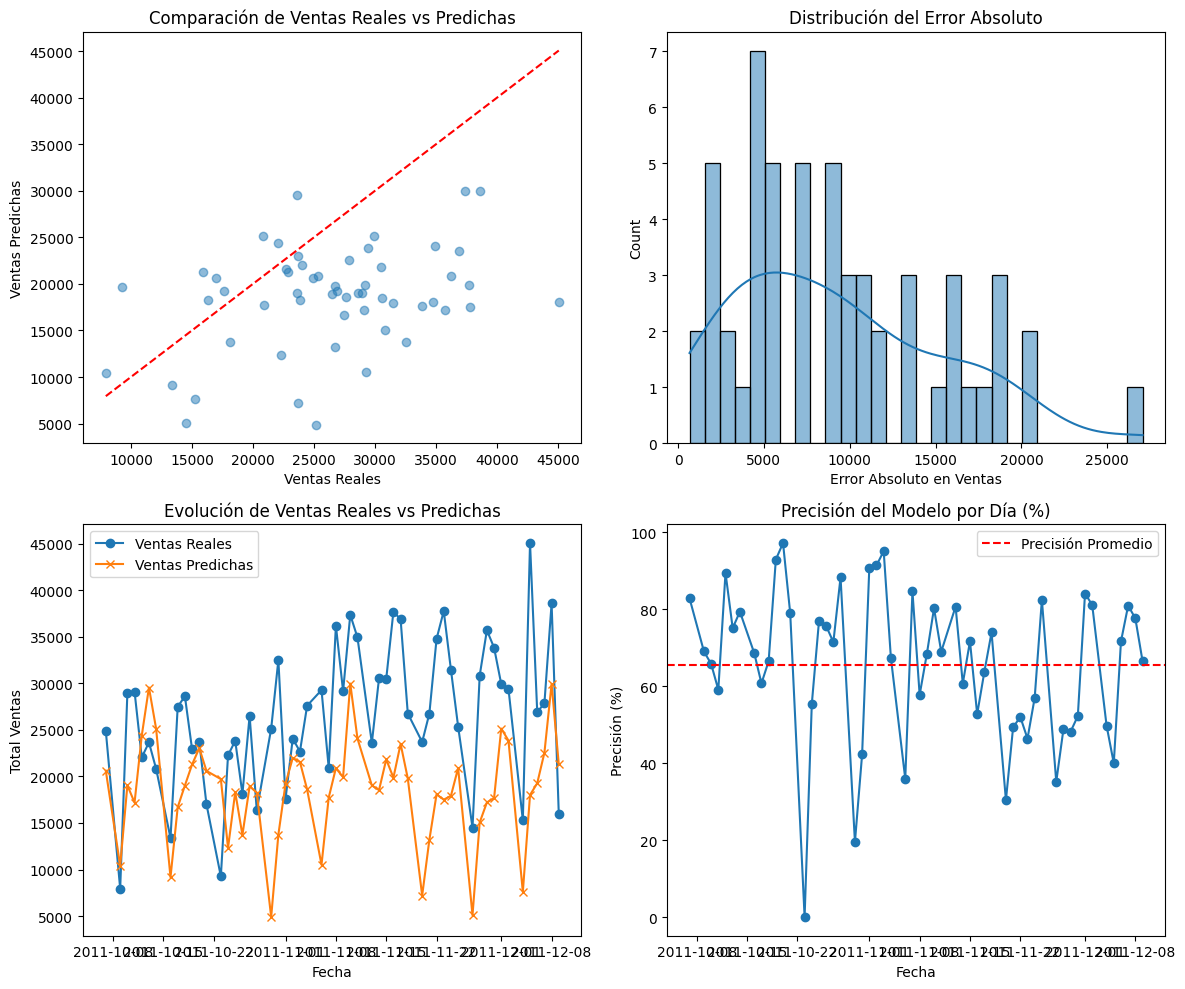

{'MAE (Mean Absolute Error)': np.float64(9256.794621804018),
 'RMSE (Root Mean Squared Error)': np.float64(11033.610964512645),
 'MAPE (Mean Absolute Percentage Error)': np.float64(34.572131368010645),
 'Precisión Promedio del Modelo (%)': np.float64(65.42786863198936)}

In [ ]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=11,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exec_analysis(y_pred)

RANDOMFOREST

Ahora un RandomForest, con su correspondiente analisis gráfico

{'MAPE (Mean Absolute Percentage Error)': np.float64(32.50198700471906), 'Precisión del Modelo (%)': np.float64(67.49801299528093)}


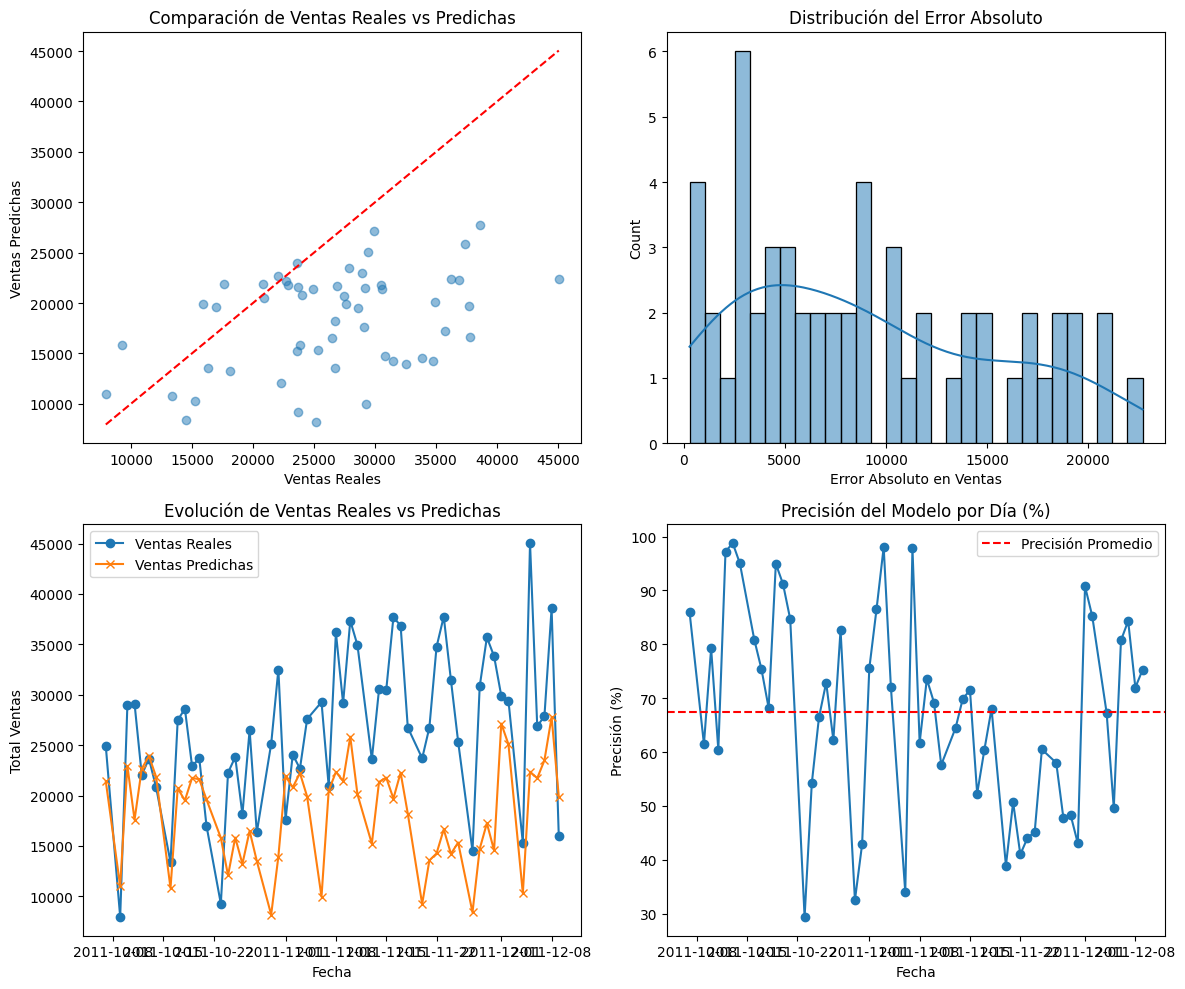

{'MAE (Mean Absolute Error)': np.float64(8990.385080111066),
 'RMSE (Root Mean Squared Error)': np.float64(10969.137686671393),
 'MAPE (Mean Absolute Percentage Error)': np.float64(32.50198700471906),
 'Precisión Promedio del Modelo (%)': np.float64(67.49801299528093)}

In [ ]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(
    n_estimators=100,
    max_depth=11,
    random_state=42,
    n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exec_analysis(y_pred)

ARIMA

Ahora un Arima, mostrando los resultados de la misma forma que los anteriores

c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pelicano\Desktop\Master IA\Lab\lab_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

{'MAPE (Mean Absolute Percentage Error)': np.float64(28.912711015948993), 'Precisión del Modelo (%)': np.float64(71.08728898405101)}


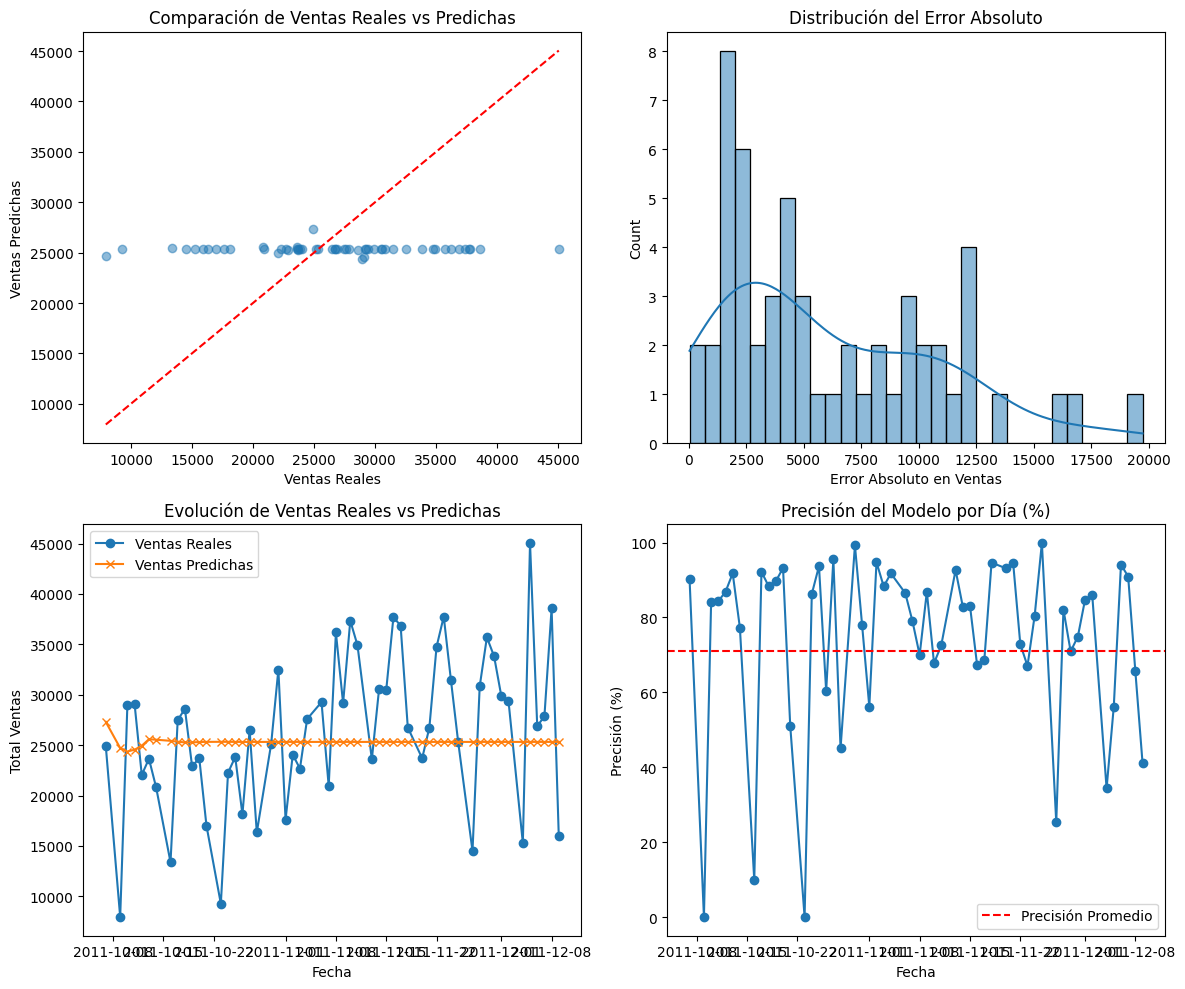

{'MAE (Mean Absolute Error)': np.float64(6191.85029333662),
 'RMSE (Root Mean Squared Error)': np.float64(7738.734270338709),
 'MAPE (Mean Absolute Percentage Error)': np.float64(28.912711015948993),
 'Precisión Promedio del Modelo (%)': np.float64(71.08728898405101)}

In [ ]:
import statsmodels.api as sm
df_arima = df.to_pandas()

df_arima["InvoiceDate"] = pd.to_datetime(df_arima["InvoiceDate"])
df_arima = df_arima.sort_values("InvoiceDate")
df_arima.set_index("InvoiceDate", inplace=True)
serie_ventas = df_arima["TotalSales"]


train_size = int(len(serie_ventas) * 0.8)
train, test = serie_ventas[:train_size], serie_ventas[train_size:]


p, d, q = 5, 1, 2
model= sm.tsa.ARIMA(train, order=(p, d, q))
model_fitted = model.fit()

y_pred = model_fitted.forecast(steps=len(test))
y_pred =  y_pred.to_numpy()
exec_analysis(y_pred)

Segun nos muestran las gráficas el random forest es el que mejor funcionaria, hay un error con el calculo de precision, ya que calcular la precision en una regresion es un poco complicado.





# TODO
Quizas probando una red neuronal podria mejorar.

Quizas convirtiendo el valor total de ventas a logaritmo natural podramos reducir el sesgo hacia la derecha que tiene la variable.

se podrian añadir algunos diagramas de boxplot o una matriz de correlacion para ver si ha correlacion entre los dias festivos y las ventas totales

En esta caso se ha obviado los paises, siendo ese el caso, igual mantener el campo festivo solo mete ruido.